<a href="https://colab.research.google.com/github/nailah040216/CodeModul3/blob/main/Data_Glucose_StatistikdanProbabilitas_Nailah_384.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

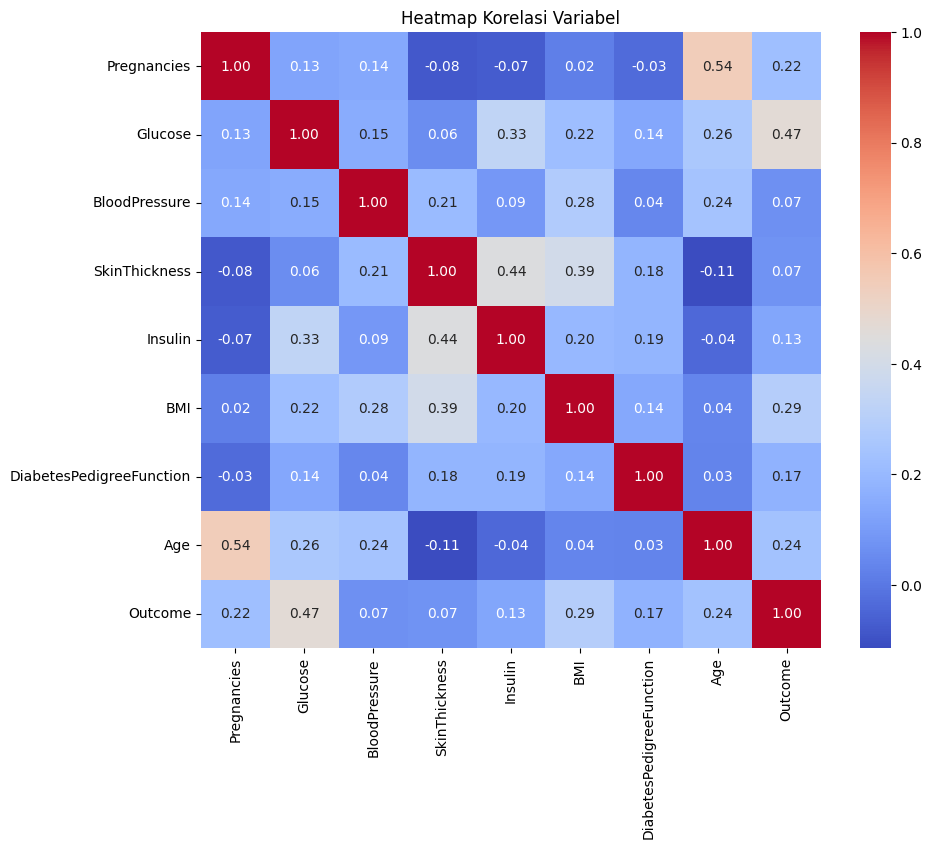

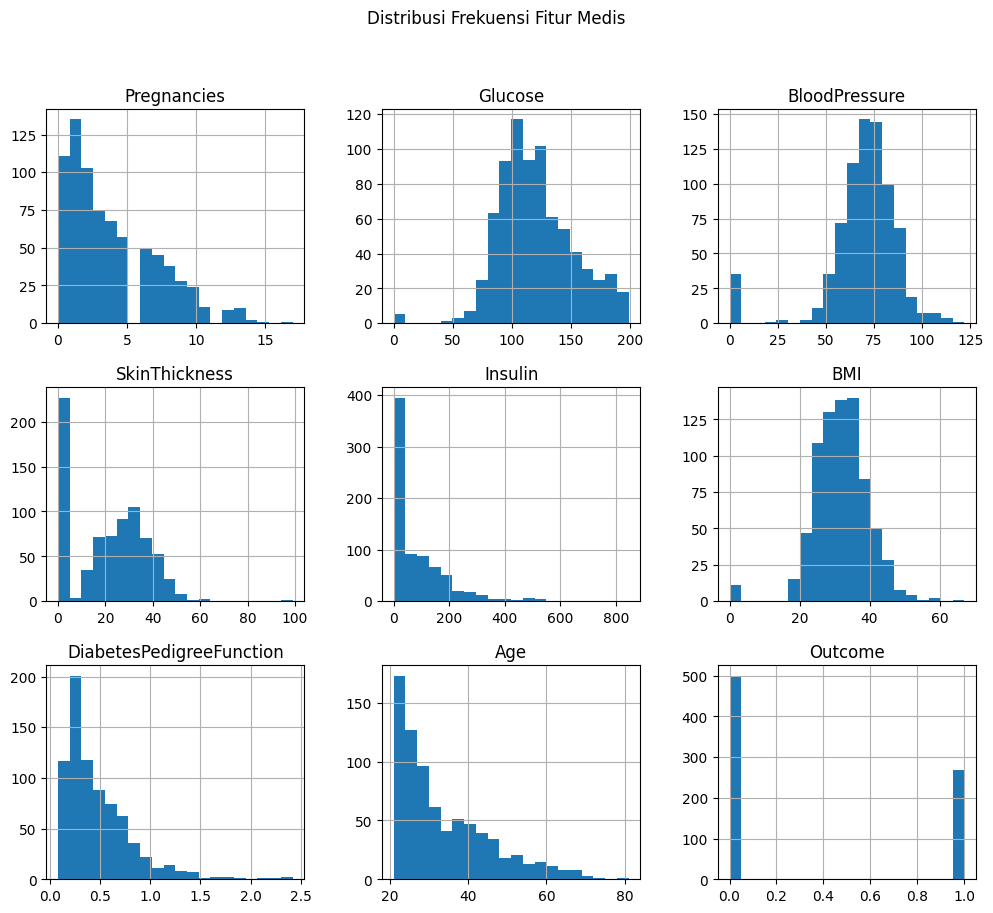

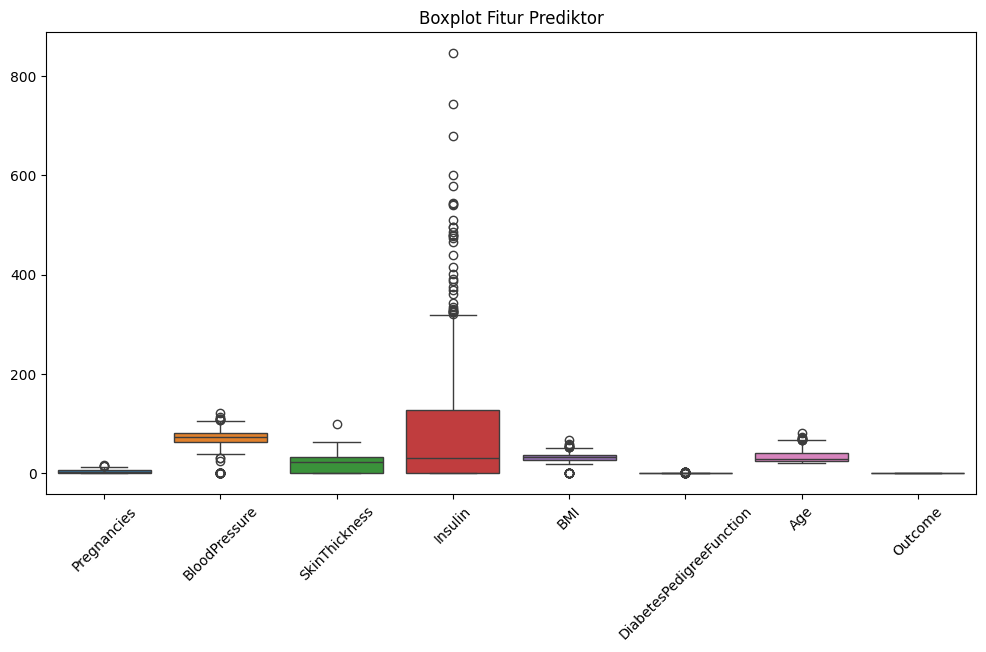

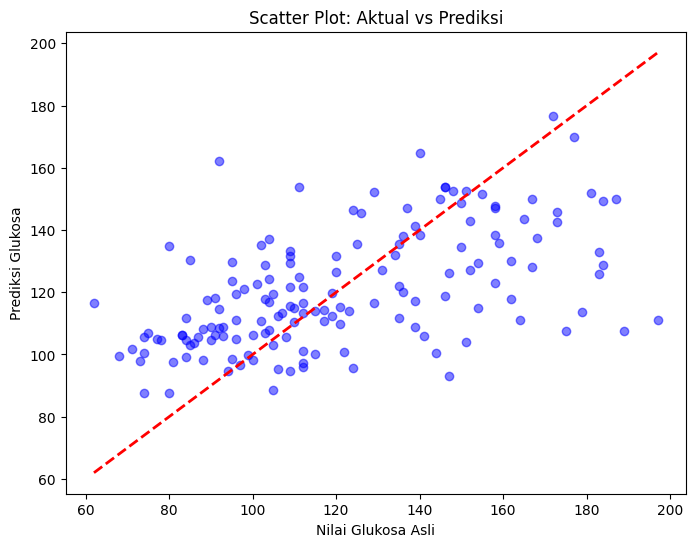

MAE setelah Imputasi: 19.96
------------------------------
METRIK EVALUASI DATA TESTING:
MAE  : 19.9578
MSE  : 625.4224
RMSE : 25.0084
R2   : 0.3785
------------------------------
Intercept: 68.9094
Koefisien Pregnancies: -0.2189
Koefisien BloodPressure: 0.2207
Koefisien SkinThickness: -0.1832
Koefisien Insulin: 0.1097
Koefisien BMI: 0.2068
Koefisien DiabetesPedigreeFunction: 3.6071
Koefisien Age: 0.3368
Koefisien Outcome: 23.5360


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('Dataset Diabetes.csv', sep=None, engine='python')
df.columns = df.columns.str.strip()

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel')
plt.savefig('correlation_heatmap.png')
plt.show()

df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribusi Frekuensi Fitur Medis')
plt.savefig('distribusi_fitur.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Glucose']))
plt.title('Boxplot Fitur Prediktor')
plt.xticks(rotation=45)
plt.savefig('boxplots.png')
plt.show()

y = df['Glucose']
X = df.drop(columns=['Glucose'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Glukosa Asli')
plt.ylabel('Prediksi Glukosa')
plt.title('Scatter Plot: Aktual vs Prediksi')
plt.savefig('scatter_plot_regresi.png')
plt.show()

df = pd.read_csv('Dataset Diabetes.csv', sep=None, engine='python')
df.columns = df.columns.str.strip()

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

X = df.drop('Glucose', axis=1)
y = df['Glucose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"MAE setelah Imputasi: {mean_absolute_error(y_test, model.predict(X_test)):.2f}")

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print("METRIK EVALUASI DATA TESTING:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2   : {r2:.4f}")
print("-" * 30)

print(f"Intercept: {model.intercept_:.4f}")

features = X.columns
coefficients = model.coef_

for feature, coef in zip(features, coefficients):
    print(f"Koefisien {feature}: {coef:.4f}")